# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования выполнить четыре задачи:**
- Изучить скорость продажи квартир, определить из них какая скорость является быстрой, а какая медленной
- Влияние на стоимость квартиры таких параметров как:
общей площади
жилой площади;
площади кухни;
количество комнат;
типа этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год);
- Выделить 10 населеных пунктов с наибольшим количеством объявлений и среднюю стоимость за м2 в данных регионах
- Влияет ли отдаленость от центра города на стоимость м2 и стоимость квартиры в г. Санкт-Петербург

**Ход исследования:**
- Обзор данных
- Предобработка данных
- Исследование

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Откройте файл с данными и изучите общую информацию. 

In [2]:
#Загружаю файл и смотрю информацию по файлу и тип столбцов
try:
    data = pd.read_csv('F:\\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.dtypes
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

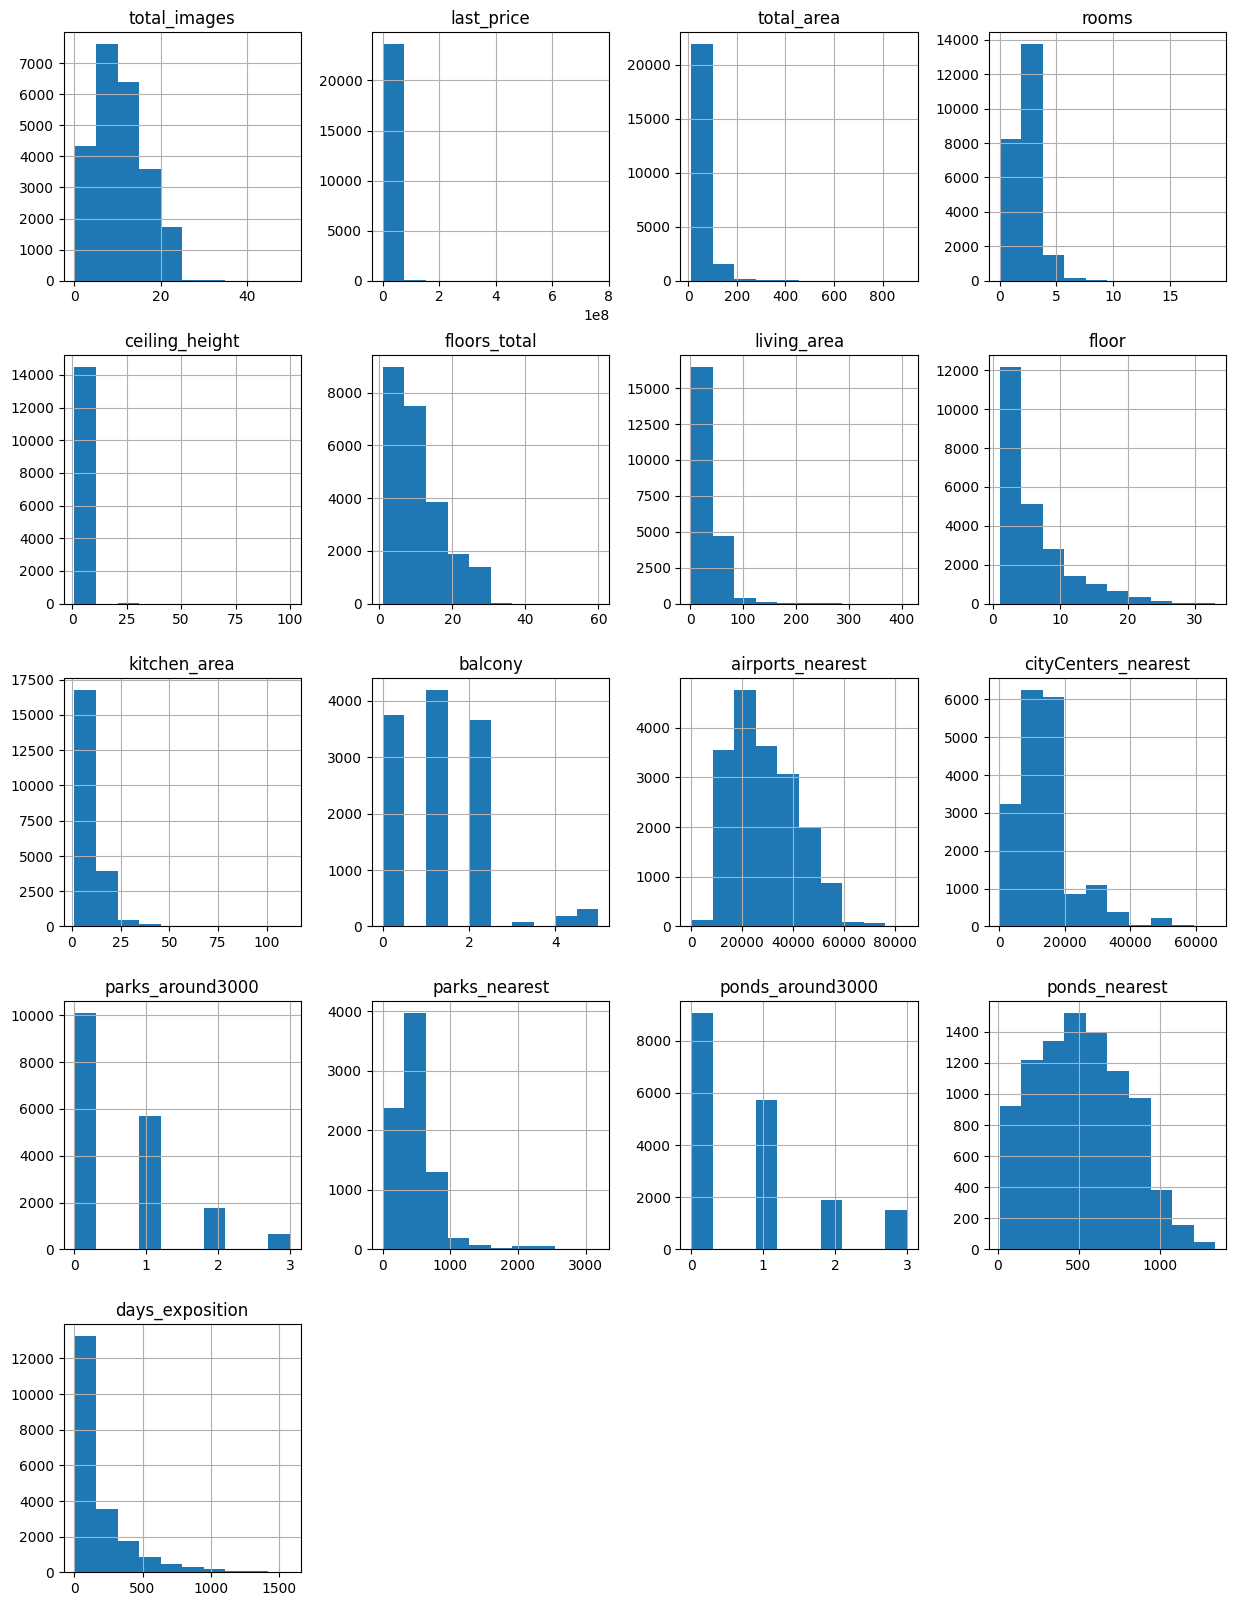

In [3]:
#Строю гистограммы для дата фрейма
data.hist(figsize=(15, 20));

### Предобработка данных
#### Поиск пропущенных значений

In [4]:
#Поиск пропущенных значений
print(data.isna().sum())
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Вывод**

Вижу, что в существующем датафрейме имеются пропуски. Информация в данной таблице заполняется двумя методами. Первый метод это данные полученные от самого пользователя(Высота потолка, количество балконов, жилая площадь, площадь кухни и т. д.). В данном случае пропуски образовались в связи с тем, что какие то данные пользователь не мог знать, так как не было под рукой технической документации под рукой. Какие то данные пользователь элементарно не захотел оформлять, так как посчитал их не значимыми при подачи объявления. Второй метод заполнения данных это автоматический, завязанный на картаграфических данных (отдаление от аэропорта, водоема и т. д.). Данные пропуски могли образоваться в связи с тем, что приложению не удолось определить ближайшие точки местоположения значимых объектов. Либо таких объектов поблизости квартиры вовсе не существует. Ниже по возможности заполним пропуски.

#### Работа с пропусками и значениями в столбцах

#### Столбец этажность дома

In [5]:
#Смотрю общую информацию о колонках и составляю срез строк, где есть пропуски в колонке
print('Смотрим наиболее встречающиеся значения:\n', \
      data['floors_total'].value_counts().head(10), '\n', sep='')
print('Проверяем минимальные и максимальные значения, а так же средние и медианы:\n', \
      data['floors_total'].describe(), sep='')

Смотрим наиболее встречающиеся значения:
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
Name: floors_total, dtype: int64

Проверяем минимальные и максимальные значения, а так же средние и медианы:
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [6]:
#Заменяю пропуски подходящим значением

for f in data['floor'].unique():
    if f <= 5:
        data.loc[(data['floor'] <= 5) & (data['floors_total'].isna()), 'floors_total'] = 5
    elif f <= 9:
        data.loc[(data['floor'] <= 9) & (data['floors_total'].isna()), 'floors_total'] = 9
    elif f <= 16:
        data.loc[(data['floor'] <= 16) & (data['floors_total'].isna()), 'floors_total'] = 16
    elif f <= 25:
        data.loc[(data['floor'] <= 25) & (data['floors_total'].isna()), 'floors_total'] = 25
    else:
        data.loc[(data['floor'] == f) & (data['floors_total'].isna()), 'floors_total'] = 'неизвестно'

data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

В данном столбце значения этажности дома привязал к столбцу на каком этаже находится квартира. Решил установить этажность дома в пропусках исходя из наиболее многочисленных (5, 10, 16, 25) этажей. Пропуски заменил исходя из этой связки. Данная связка наиболее приближенна к реальным результатам. Способ не идеален, но пропусков в данном столбце было не много, (86) штук. Большой погрешности на конечный результат данный способ не даст.

#### Столбец высота потолков

In [7]:
#Работа с колонкой высота потолков
#Определяем эксклюзивные значение и наибольшее количество значений.
print('Смотрим наиболее встречающиеся значения:\n', \
      data['ceiling_height'].value_counts().head(10), '\n', sep='')
print('Проверяем минимальные и максимальные значения, а так же средние и медианы:\n', \
      data['ceiling_height'].describe(), '\n', sep='')
print('Смотрим уникальные значения:\n', \
      data['ceiling_height'].unique(), '\n', sep='')

Смотрим наиболее встречающиеся значения:
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
Name: ceiling_height, dtype: int64

Проверяем минимальные и максимальные значения, а так же средние и медианы:
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Смотрим уникальные значения:
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4

In [8]:
for f in data['floors_total'].unique():
    if f <= 3:
        data.loc[(data['floors_total'] <= 3) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 3, 'ceiling_height'].median()
    elif f <= 5:
        data.loc[(data['floors_total'] <= 5) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 5, 'ceiling_height'].median()
    elif f <= 10:
        data.loc[(data['floors_total'] <= 10) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 10, 'ceiling_height'].median()
    elif f <= 16:
        data.loc[(data['floors_total'] <= 16) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 16, 'ceiling_height'].median()
    elif f <= 25:
        data.loc[(data['floors_total'] <= 25) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 25, 'ceiling_height'].median()
    elif f > 25:
        data.loc[(data['floors_total'] > 25) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] <= 25, 'ceiling_height'].median()
    else:
        data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = 'неизвестно'
        
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = \
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10
print(data['ceiling_height'].sort_values().unique())

[ 1.    1.2   1.75  2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45  2.46
  2.47  2.48  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58
  2.59  2.6   2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7
  2.71  2.72  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82
  2.83  2.84  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94
  2.95  2.96  2.97  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06
  3.07  3.08  3.09  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18
  3.2   3.21  3.22  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31
  3.32  3.33  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44
  3.45  3.46  3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56
  3.57  3.58  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7
  3.75  3.76  3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9
  3.93  3.95  3.98  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25  4.3
  4.37  4.4   4.45  4.5   4.65  4.7   4.8   4.9   5.   

Выше были заменены значения в дата фрейме, те значения что выше 20 были разделены на 10, так как пользователь мог неправильно выставить дробную часть и получились анамально высокие значения. Так же пропуски было решено заменить медианым значением высоты потолков, зданий аналогичных этажностей. Так как до 3 этажа могут быть коттеджи, а в зданиях 5 этажных, 10 и т. д., высота потолков, скорее всего одного размера.

#### Столбец жилая площадь

In [9]:
print('Смотрим наиболее встречающиеся значения:\n', \
      data['total_area'].value_counts().head(10), '\n', sep='')
print('Проверяем минимальные и максимальные значения, а так же средние и медианы:\n', \
      data['total_area'].describe(), '\n', sep='')

Смотрим наиболее встречающиеся значения:
45.0    419
42.0    383
60.0    347
31.0    346
44.0    345
40.0    315
43.0    301
32.0    289
46.0    282
36.0    280
Name: total_area, dtype: int64

Проверяем минимальные и максимальные значения, а так же средние и медианы:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



In [10]:
mean_area = [12, 40, 52, 69,]

#Поделил на группы и по каждой группе выявил средий процент жилой площади от общей, 
#и заменил пропуски умножив общую площадь квартиры на процент

for m in mean_area:
    if m < 40:
        precent_min_area = data.loc[data['total_area'] < 40, 'living_area'] \
        / data.loc[data['total_area'] < 40, 'total_area']
        precent_min_area = precent_min_area.mean()
        data.loc[(data['living_area'].isna()) & (data['total_area'] < 40), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['total_area'] < 40), 'total_area'] * precent_min_area
    elif m == 40:
        precent_normal1_area = data.loc[(data['total_area'] >= 40) & (data['total_area'] < 52), 'living_area'] \
        / data.loc[(data['total_area'] >= 40) & (data['total_area'] < 52), 'total_area']
        precent_normal1_area = precent_normal1_area.mean()
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 40) & (data['total_area'] < 52), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 40) & (data['total_area'] < 52), 'total_area'] \
        * precent_normal1_area
    elif m == 52:
        precent_normal2_area = data.loc[(data['total_area'] >= 52) & (data['total_area'] < 69), 'living_area'] \
        / data.loc[(data['total_area'] >= 52) & (data['total_area'] < 69), 'total_area']
        precent_normal2_area = precent_normal2_area.mean()
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 52) & (data['total_area'] < 69), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 52) & (data['total_area'] < 69), 'total_area'] \
        * precent_normal2_area
    elif m == 69:
        precent_max_area = data.loc[(data['total_area'] >= 69), 'living_area'] \
        / data.loc[(data['total_area'] >= 69), 'total_area']
        precent_max_area = precent_max_area.mean()
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 69), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['total_area'] >= 69), 'total_area'] \
        * precent_max_area
        
print(f'Средний процент жилой площади от общей площади при квартире общей площади менее 40м2: {precent_min_area:.0%} \
\nСредний процент жилой площади от общей площади при квартире общей площади более 40м2, но менее 52м2: {precent_normal1_area:.0%}\
\nСредний процент жилой площади от общей площади при квартире общей площади более 52м2, но менее 69м2: {precent_normal2_area:.0%}\
\nСредний процент жилой площади от общей площади при квартире общей площади более 69м2: {precent_max_area:.0%}')

Средний процент жилой площади от общей площади при квартире общей площади менее 40м2: 52% 
Средний процент жилой площади от общей площади при квартире общей площади более 40м2, но менее 52м2: 55%
Средний процент жилой площади от общей площади при квартире общей площади более 52м2, но менее 69м2: 60%
Средний процент жилой площади от общей площади при квартире общей площади более 69м2: 59%


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  object 
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Жилую площадь, мною было решено привязать к общей площади квартиры. Площади разделил на срезы наиболее популярных площадей квартир (до 40кв2, 40кв2-52кв2, 52кв2-69кв2, свыше 69кв2). По данным срезам посчитал средний процент жилой площади от общей площади. Заполнил пропуски жилой площади, процентным соотношением от общей площади квартиры. Считаю данное заполнение наиболее приблеженное к реальным.

#### Столбец апартаменты

In [12]:
#Работа с колонкой апартаменты
print(data['is_apartment'].unique())
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

[nan False True]


В данной колонке, мной было решено заменить пропуски "False". Так как люди скорее всего пропускали данный пункт, из за того, что у них квартиры, а не апартаменты.

#### Столбец размер кухни

In [13]:
print('Средний процент кухни от жилой площади:', round((data['kitchen_area']/data['total_area']).mean()*100))

Средний процент кухни от жилой площади: 19


In [14]:
#Поделил на группы и по каждой группе выявил средий процент площади кухни от общей, 
#и заменил пропуски умножив общую площадь квартиры на процент

for m in mean_area:
    if m < 40:
        precent_min_kitchen_area = data.loc[data['total_area'] < 40, 'kitchen_area'] \
        / data.loc[data['total_area'] < 40, 'total_area']
        precent_min_kitchen_area = precent_min_kitchen_area.mean()
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] < 40), 'kitchen_area'] = \
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] < 40), 'total_area'] * precent_min_kitchen_area
    elif m == 40:
        precent_normal1_kitchen_area = data.loc[(data['total_area'] >= 40) & (data['total_area'] < 52), 'kitchen_area'] \
        / data.loc[(data['total_area'] >= 40) & (data['total_area'] < 52), 'total_area']
        precent_normal1_kitchen_area = precent_normal1_kitchen_area.mean()
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 40) & (data['total_area'] < 52), 'kitchen_area'] = \
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 40) & (data['total_area'] < 52), 'total_area'] \
        * precent_normal1_kitchen_area
    elif m == 52:
        precent_normal2_kitchen_area = data.loc[(data['total_area'] >= 52) & (data['total_area'] < 69), 'kitchen_area'] \
        / data.loc[(data['total_area'] >= 52) & (data['total_area'] < 69), 'total_area']
        precent_normal2_kitchen_area = precent_normal2_kitchen_area.mean()
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 52) & (data['total_area'] < 69), 'kitchen_area'] = \
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 52) & (data['total_area'] < 69), 'total_area'] \
        * precent_normal2_kitchen_area
    elif m == 69:
        precent_max_kitchen_area = data.loc[(data['total_area'] >= 69), 'kitchen_area'] \
        / data.loc[(data['total_area'] >= 69), 'total_area']
        precent_max_kitchen_area = precent_max_kitchen_area.mean()
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 69), 'kitchen_area'] = \
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] >= 69), 'total_area'] \
        * precent_max_kitchen_area
        
print(f'Средний процент кухни от общей площади при квартире общей площади менее 40м2: {precent_min_kitchen_area:.0%} \
\nСредний процент кухни от общей площади при квартире общей площади более 40м2, но менее 52м2: {precent_normal1_kitchen_area:.0%}\
\nСредний процент кухни от общей площади при квартире общей площади более 52м2, но менее 69м2: {precent_normal2_kitchen_area:.0%}\
\nСредний процент кухни площади от общей площади при квартире общей площади более 69м2: {precent_max_kitchen_area:.0%}')

Средний процент кухни от общей площади при квартире общей площади менее 40м2: 24% 
Средний процент кухни от общей площади при квартире общей площади более 40м2, но менее 52м2: 20%
Средний процент кухни от общей площади при квартире общей площади более 52м2, но менее 69м2: 16%
Средний процент кухни площади от общей площади при квартире общей площади более 69м2: 15%


Пропуски по площади кухни, заменил таким же образом, что и жилую площадь.

#### Столбец балконы

In [15]:
#Работа с пропусками балконы
data.loc[data['balcony'].isna(), 'balcony'] = 0

Пропуски по балконам были заменены значением 0. Так как пропустив данный пунк, в квартире продавца скорее всего нет балконов.

#### Столбец название населеного пункта

In [16]:
#Работа с колонкой название населеного пункта
print(data['locality_name'].sort_values().unique())
data = data.dropna(subset=['locality_name'])
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

В данной колонке пропуски мной было решено не менять, так как количество пропусков незначительное и на результат сильно не повлияют. Но мной были заменена буква ё на е, что снизило количество неявных дупликатов.

In [17]:
#Работа с объектами растояние до ближайщих объектов (парки, водоемы, аэропорты). Колонкой days_exposition.
#Смотрим сколько строк со значением 0 до значимых объектов
print(data.loc[data['airports_nearest'] == 0, 'airports_nearest'].count())
print(data.loc[data['cityCenters_nearest'] == 0, 'cityCenters_nearest'].count())
print(data.loc[data['parks_around3000'] == 0, 'parks_around3000'].count())
print(data.loc[data['parks_nearest'] == 0, 'parks_nearest'].count())
print(data.loc[data['ponds_around3000'] == 0, 'ponds_around3000'].count())
print(data.loc[data['ponds_nearest'] == 0, 'ponds_nearest'].count())

1
0
10080
0
9055
0


Чтоб не искажать результат исследования, мной было принято реешние не менять пропуски в данных колонках. Пропсуки появились скорее всего из-за того, что программа не смогла определить ближайщие объекты до дома. Данные дома скорее всего находятся в одном населеном пункте, так как количество пропусков почти одинаковое. Была идея заменить пропуски 0, но от нее отказался так как в колонках, которые показывают количество парков и водоемов в радиусе 3км, имеются такие значения. Столбец days_exposition, так же оставил без изменения, так как пропуски в нем образовались, скорее всего, из-за того, что объявления на момент составления базы данных, были еще размещены.

In [18]:
#Замена типа данных в столбцах
data['last_price'] = data['last_price'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64[M]')
data['living_area'] = round(data['living_area'], 1)
print(data.duplicated().sum())
data.dtypes

0


total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Для того, чтоб данные были наиболее корректны, в некоторых столбцах были заменены тип данных с вещественных чисел на целые. Так же вместо строк в колонке апартоменты был изменен тип данных на логический. Время было переведено в формат времени. Все это сделано, чтоб дальнейшие исследования были наиболее истиными.

### Проведите исследовательский анализ данных
#### Добавление новых столбцов для исследования

In [19]:
#Добавление новых столбцов в таблицу
data['price_m2'] = round(data['last_price'] / data['total_area'], 1)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['floor_type'] = 'другое'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floors_total'] == data['floor'], 'floor_type'] = 'последний'
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-01,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,4,3,2019,другое,16.0
1,7,3350000,40.4,2018-12-01,1,2.60,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,5,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-01,2,2.60,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,5,8,2015,другое,14.0
3,0,64900000,159.0,2015-07-01,3,2.60,14,93.5,9,False,...,84.0,3.0,234.0,424.0,408176.1,2,7,2015,другое,7.0
4,2,10000000,100.0,2018-06-01,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,4,6,2018,другое,8.0


#### Изучение значений колонок и удаление аномальных значений

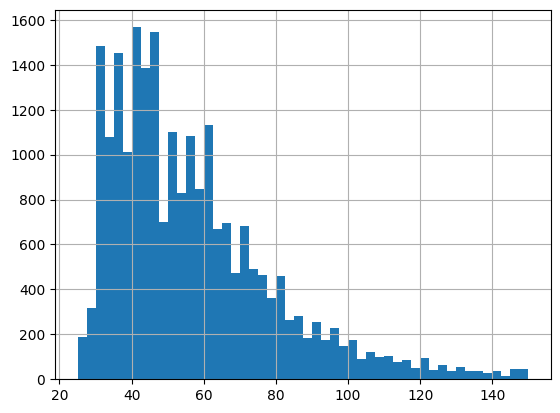

In [20]:
#Изучаем колонку total_area
data['total_area'].describe()
total_area_medium = data.query('total_area > 12 and total_area < 400')
total_area_medium['total_area'].hist(bins=50, range=(25, 150))
data = data.query('total_area < 400')

Делаю срез из наиболее частовстречаемых значений и делаю гистограмму. Видим, что основная масса квартир продается от 40м2 до 50м2. Далее идут квартиры от 50м2 до 60м2. Удаляем из таблицы редкие значения. Значения 12м2 и выше, решено было оставить, так как это могли быть комнаты.

count    23624.000000
mean        34.339295
std         20.876003
min          2.000000
25%         18.900000
50%         30.000000
75%         42.200000
max        264.500000
Name: living_area, dtype: float64


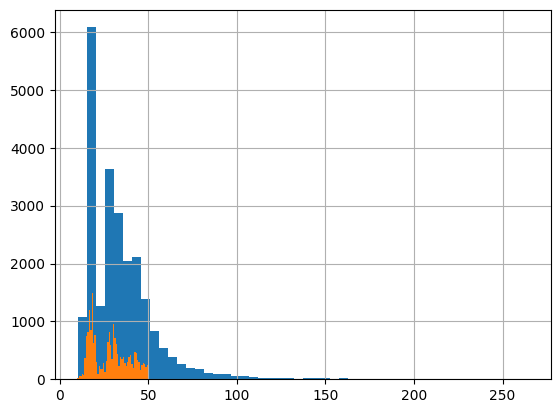

In [21]:
#Изучаем колонку living_area
print(data['living_area'].describe())
data = data.query('living_area > 10')
data['living_area'].hist(bins=50);
data['living_area'].hist(bins=50, range=(10, 50));

Убираем из таблицы значения менее 10м2.

count    23557.000000
mean        10.479943
std          5.680287
min          1.300000
25%          7.100000
50%          9.080000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64


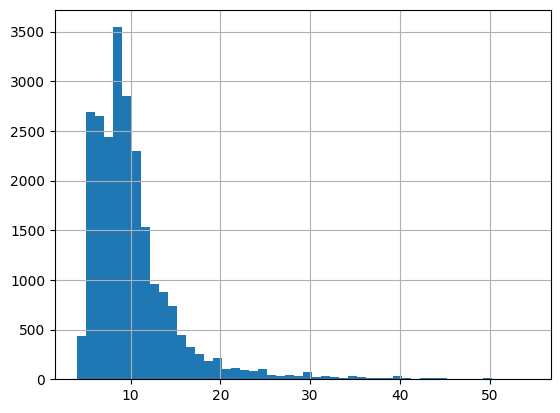

In [22]:
#Изучаем колонку living_area
print(data['kitchen_area'].describe())
data = data.query('kitchen_area > 4 and kitchen_area < 55')
data['kitchen_area'].hist(bins=50);

Убираем из таблицы аномально низкие значения кухни и аномально высокие.

count    2.346800e+04
mean     6.324857e+06
std      7.861151e+06
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64


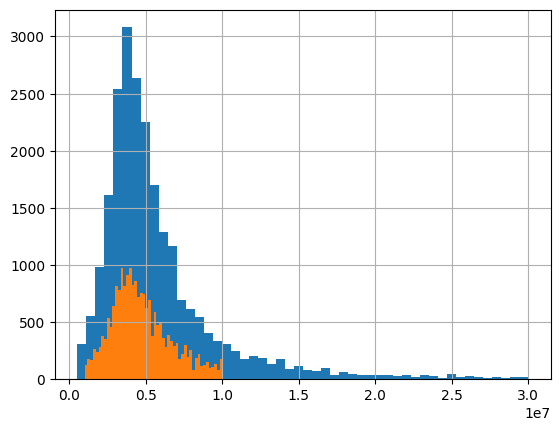

In [23]:
#Изучаем колонку last_price
data['last_price'] = round(data['last_price'], 1)
print(data['last_price'].describe())
data = data.query('last_price > 500000 and last_price < 30000000')
data['last_price'].hist(bins=50);
data['last_price'].hist(bins=50, range=(1000000, 10000000));


Основное количество объявлений размещается за цену от 3 до 5 млн руб. Так же были удалены из дата фрейма анамально высокие значения, которых не сильно много.

count    23171.000000
mean         2.042596
std          1.027061
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


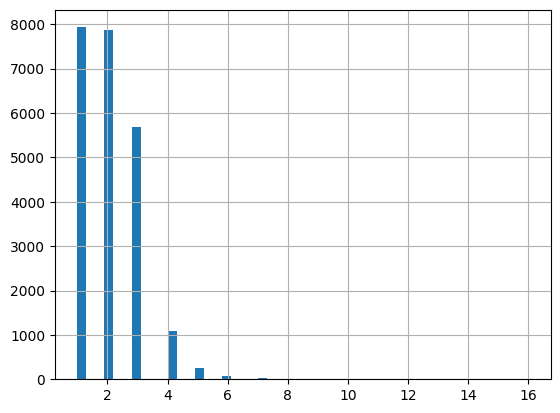

In [24]:
#Изучаем колонку rooms
print(data['rooms'].describe())
data = data.query('rooms >= 1')
data['rooms'].hist(bins=50);

В основном квартиры продаются до 3 комнат, есть редкие значения в 16 комнат, скорее всего в загородном доме. Так же из дата фрейма были удалены значения 0.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22980 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22980 non-null  int64         
 1   last_price              22980 non-null  int32         
 2   total_area              22980 non-null  float64       
 3   first_day_exposition    22980 non-null  datetime64[ns]
 4   rooms                   22980 non-null  int64         
 5   ceiling_height          22980 non-null  float64       
 6   floors_total            22980 non-null  int32         
 7   living_area             22980 non-null  float64       
 8   floor                   22980 non-null  int64         
 9   is_apartment            22980 non-null  bool          
 10  studio                  22980 non-null  bool          
 11  open_plan               22980 non-null  bool          
 12  kitchen_area            22980 non-null  float6

count    22980.000000
mean         2.674144
std          0.271836
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64


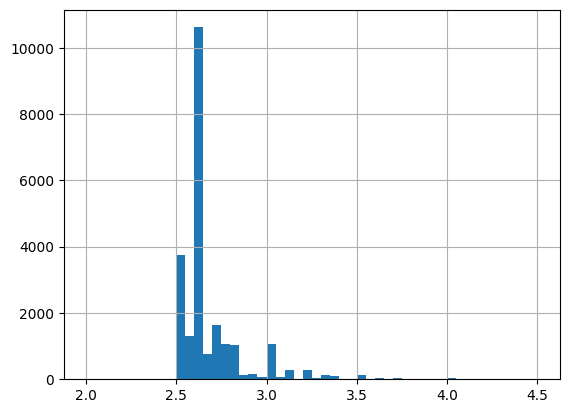

In [26]:
#Изучаем колонку ceiling_height
print(data['ceiling_height'].describe())
data = data.query('ceiling_height >= 2.5 and ceiling_height <=4')
data['ceiling_height'].hist(bins=50, range=(2, 4.5));

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22868 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22868 non-null  int64         
 1   last_price              22868 non-null  int32         
 2   total_area              22868 non-null  float64       
 3   first_day_exposition    22868 non-null  datetime64[ns]
 4   rooms                   22868 non-null  int64         
 5   ceiling_height          22868 non-null  float64       
 6   floors_total            22868 non-null  int32         
 7   living_area             22868 non-null  float64       
 8   floor                   22868 non-null  int64         
 9   is_apartment            22868 non-null  bool          
 10  studio                  22868 non-null  bool          
 11  open_plan               22868 non-null  bool          
 12  kitchen_area            22868 non-null  float6

Из гистограммы видим, что основная высота потолков составляет 2,5 и 2.75 метра. Из дата фрейма так же были удалены аномальные значения и оставленны высота потолков 2,5м до 4м

count    22868.000000
mean         5.887266
std          4.881763
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
count    22868.000000
mean        10.697263
std          6.587122
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


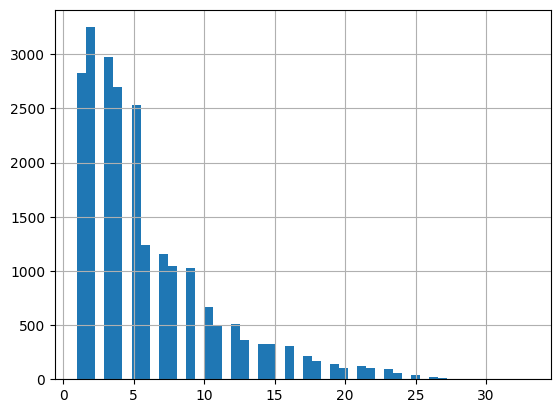

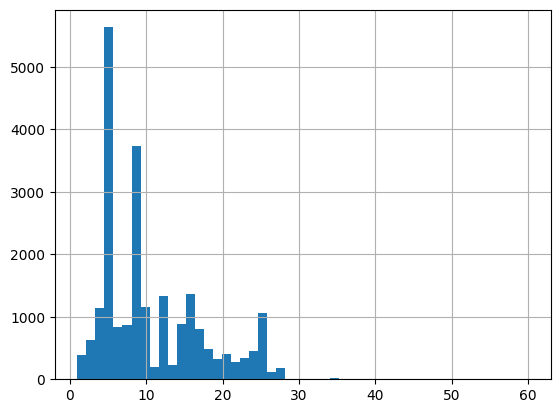

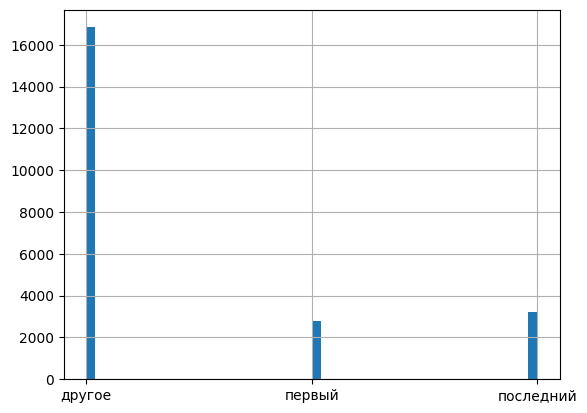

In [28]:
#Изучаем колонку floor, floors_total, floor_type
print(data['floor'].describe())
print(data['floors_total'].describe())
plt.show()
data['floor'].hist(bins=50)
plt.show()
data['floors_total'].hist(bins=50)
plt.show()
data['floor_type'].hist(bins=50)
data = data.query('floor <= 25')
data = data.query('floors_total <= 25')

Этажность решил объединить. По гистограммам видим, что большинство квартир находятся не на первом и втором этаже. Преобладают дома с этажностью 5, 9, 10, 16 и 25. Очень много квартир находится до 5 этажа, скорее всего из-за того, что много домов старого фонда до 5ти этажей, что так же поддверждается на 2 гистограмме. Так же были убраны квартиры и дома выше 25 этажа, так как их количество незначительное.

count    17274.000000
mean     14310.168403
std       8633.930522
min        208.000000
25%       9497.250000
50%      13138.000000
75%      16240.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


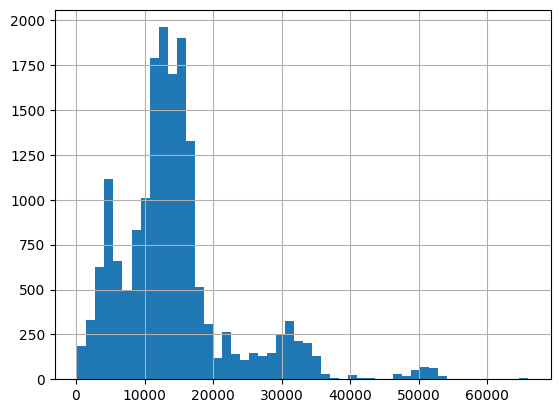

In [29]:
#Изучаем колонку cityCenters_nearest
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].hist(bins=50);

Основные предложения жилья находятся от 11км до 16км от центра города. Из гистограммы видим несколько пиков. Это может быть связано с тем, что застройщики строили новые районы и поселки, где в скором времени появлялся большой всплеск предложения. 

count    17254.000000
mean     28700.694969
std      12603.462962
min          0.000000
25%      18428.000000
50%      26757.500000
75%      37248.500000
max      84869.000000
Name: airports_nearest, dtype: float64


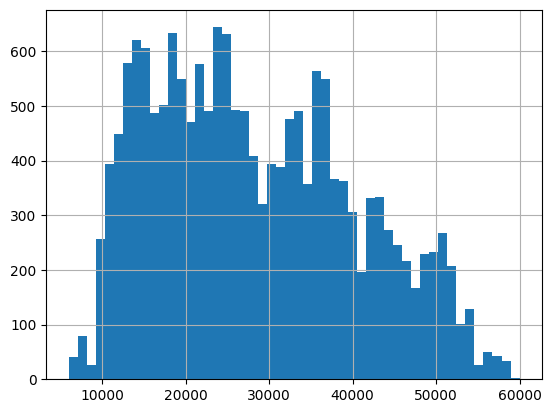

In [30]:
#Изучаем колонку airports_nearest
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins=50, range=(6000, 60000));

В большинстве своем квартиры находятся от 10км до ближайщего аэропорта, что логично, так как шум от самолетвов, если строить ближе очень мешал бы жильцам. Так же в основном большинство квартир находятся не дальше 60км от аэропорта, что так же логично, так как для многих удобно находится не далеко от аэропорта, чтоб можно было быстро и с наименьшими затратами добраться до другого города или страны.

count    7678.000000
mean      492.672310
std       343.239466
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


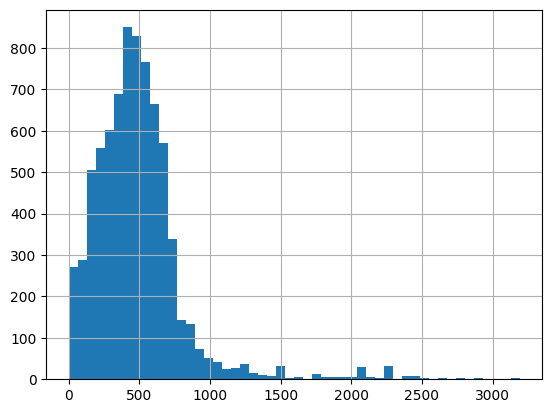

In [31]:
#Изучаем колонку parks_nearest
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=50);

В большинстве случаев, парк находится в пределах 500м от квартиры. На гистограмме есть редкие значения, но их удалять не буду, так как они сильной погрешности в данных не принесут.

count    22538.000000
mean         3.045213
std          1.920907
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64
count    22538.000000
mean         6.390141
std          3.492946
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


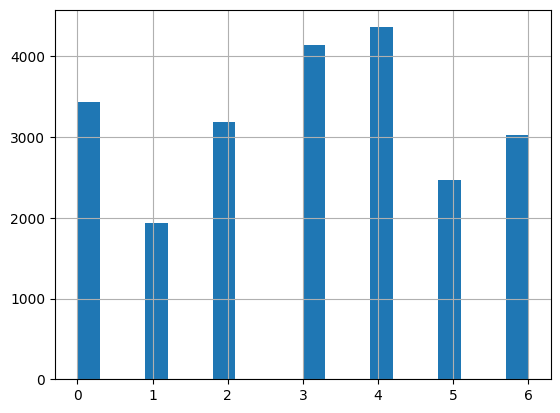

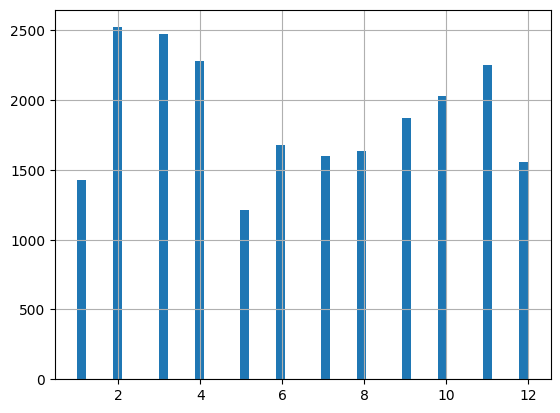

In [32]:
#Изучаем колонку floor, floors_total, floor_type
print(data['weekday'].describe())
print(data['month'].describe())
plt.show()
data['weekday'].hist(bins=20);
plt.show()
data['month'].hist(bins=50);

Из гистограмм видим, что пик подачи объявлений о продажи недвижимости приходится на будние дни. Активность продажи наиболее видна в феврале, марте и апреле.

count    19526.000000
mean       180.562737
std        219.699309
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64


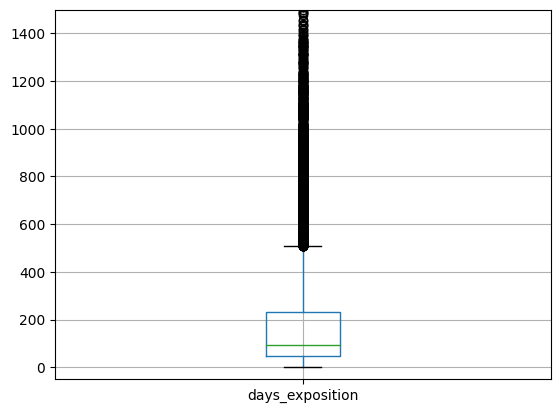

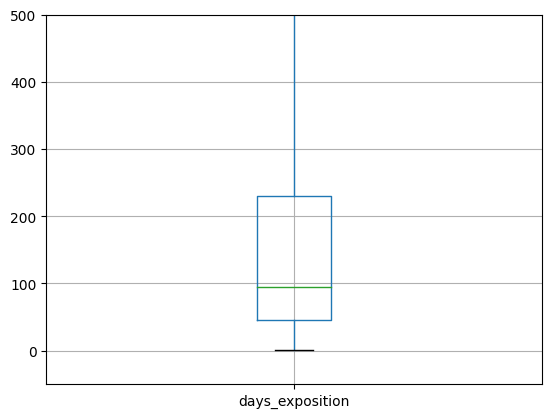

Медианое количество дней продажи: 95
Среднее количество дней продажи: 181


In [33]:
#Изучаем колонку days_exposition
print(data['days_exposition'].describe())
plt.ylim(-50, 1500)
data.boxplot(column='days_exposition')
plt.show()
plt.ylim(-50, 500)
data.boxplot(column='days_exposition')
plt.show()
print('Медианое количество дней продажи:', round(data['days_exposition'].median()))
print('Среднее количество дней продажи:', round(data['days_exposition'].mean()))

Из анализа выше мы видим, что среднее медианое время продажи квартиры является 95 дней. Так же видим, что среднее время является 181 день. Лучше ориентироваться на медианое значения, так как из-за аномально высоких значений, которые мы видим из 1 графика, среднее значение искажено. Быстрыми продажами можно считать квартиры, которые продались менее, чем за 50 дней, вто время к долгим продажам относится те квартиры, которые продавались свышше 210 дней. 

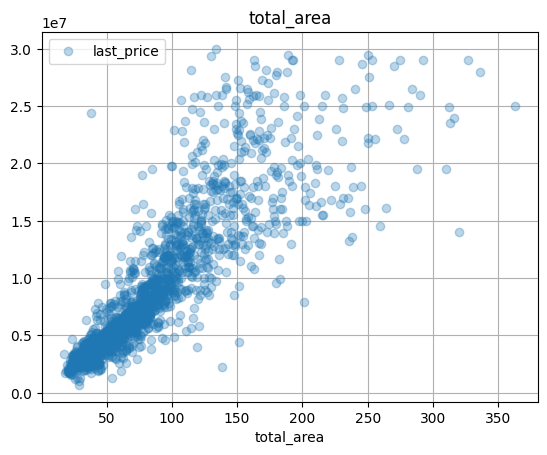

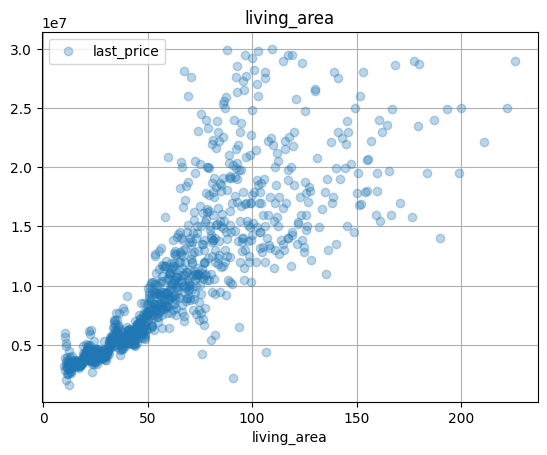

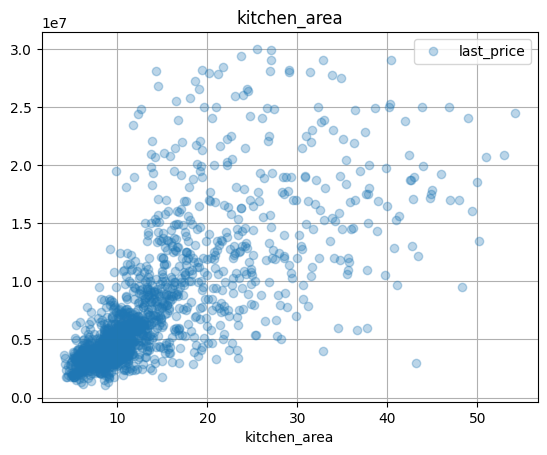

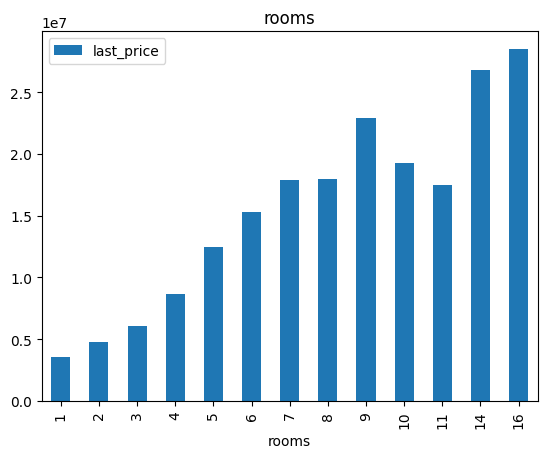

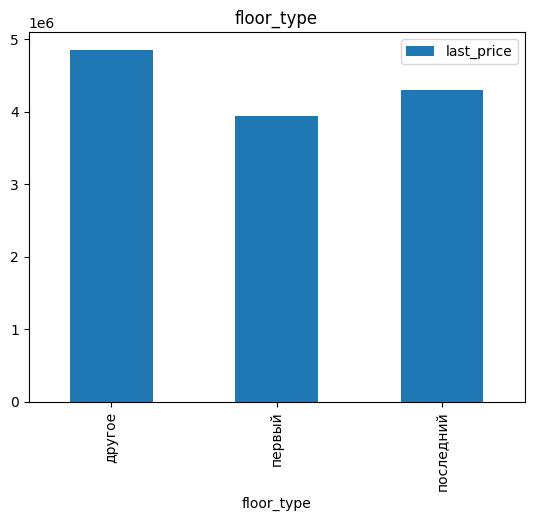

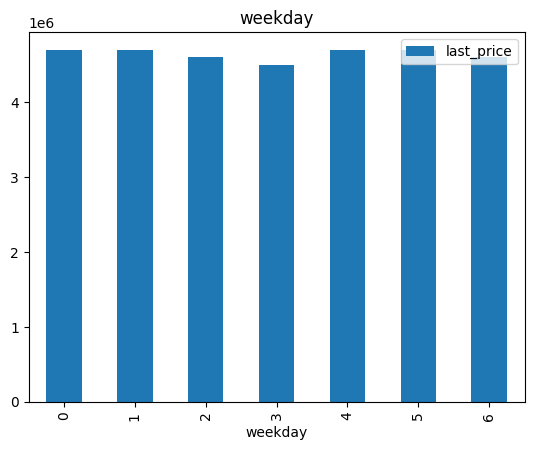

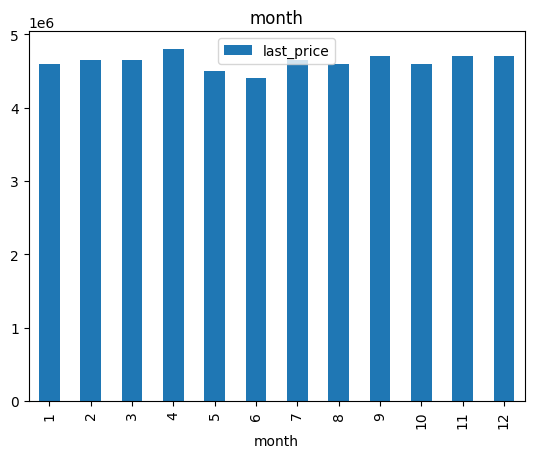

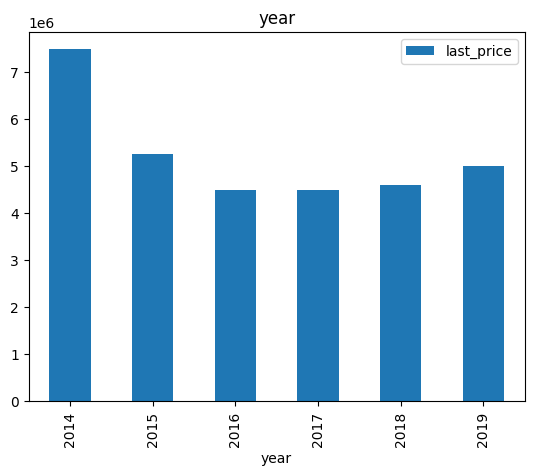

In [34]:
#Изучаем, какие факторы больше всего влияют на общую стоимость. Строим графики для каждой категории.
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o', grid=True, alpha=0.3, title='total_area');
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(style='o', grid=True, alpha=0.3, title='living_area');
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(style='o', grid=True, alpha=0.3, title='kitchen_area');
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar', y='last_price', title='rooms');
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', y='last_price', title='floor_type');
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(kind='bar', y='last_price', title='weekday');
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(kind='bar', y='last_price', title='month');
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(kind='bar', y='last_price', title='year');

In [35]:
#Смотрим корреляцию параметров на цену
for t in data['floor_type'].unique():
    if t == 'другое':
        data.loc[data['floor_type'] == 'другое', 'floor_type_corr'] = 0
    elif t == 'первый':
        data.loc[data['floor_type'] == 'первый', 'floor_type_corr'] = 1
    else:
        data.loc[data['floor_type'] == 'последний', 'floor_type_corr'] = 2
print('Корреляция общей площади и цены:', data['total_area'].corr(data['last_price']))
print('Корреляция жилой площади и цены:', data['living_area'].corr(data['last_price']))
print('Корреляция площади кухни и цены:', data['kitchen_area'].corr(data['last_price']))
print('Корреляция  количество комнат и цены:', data['rooms'].corr(data['last_price']))
print('Корреляция типа этажа и цены:', data['floor_type_corr'].corr(data['last_price']))
print('Корреляция дня недели и цены:', data['weekday'].corr(data['last_price']))
print('Корреляция месяца и цены:', data['month'].corr(data['last_price']))
print('Корреляция года и цены:', data['year'].corr(data['last_price']))

Корреляция общей площади и цены: 0.7897197641378316
Корреляция жилой площади и цены: 0.6951840382461545
Корреляция площади кухни и цены: 0.6227616553105833
Корреляция  количество комнат и цены: 0.5181960273750886
Корреляция типа этажа и цены: -0.07151448969251814
Корреляция дня недели и цены: -0.002394544815771825
Корреляция месяца и цены: 0.005548704778712437
Корреляция года и цены: -0.03939942491854406


Наибольшая связь цены на квартиру идет с общей площадью. Чуть менее взаимосвязаны площадь кухни и жилой площади относительно цены. Чем больше комнат в квартире, тем стоимость квартиры выше, что так же вытекает из предыдущих графиков. Так же на цену влияет и тип этажа. Наименее всего на цену влияют день недели, месяц, год. По последнему графику видно, что пик цен наблюдался в 2014 году.

In [36]:
#Считаем среднюю цену в 10 поселках с наибольшим количеством размещенных объявлений
locality_name_max = data.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'median'])
locality_name_max.columns = ['count', 'median_price']
locality_name_max['median_price'] = round(locality_name_max['median_price'], 1)
display('Города и поселки с наибольшим количеством объявлений и средняя цена за м2:',\
        locality_name_max.sort_values(by='count', ascending=False).head(10))
print('Город с самой высокой средней ценой за м2:',\
        locality_name_max['median_price'].idxmax())
print('Город с самой низкой средней ценой за м2::',\
        locality_name_max['median_price'].idxmin())

'Города и поселки с наибольшим количеством объявлений и средняя цена за м2:'

,count,median_price
locality_name,,
Санкт-Петербург,15009,103846.2
поселок Мурино,446,85145.7
поселок Шушары,429,76923.1
Всеволожск,390,65789.5
Пушкин,358,99725.4
Колпино,336,74723.8
Гатчина,307,67796.6
деревня Кудрово,281,91666.7
Выборг,232,58233.0


Город с самой высокой средней ценой за м2: деревня Бор
Город с самой низкой средней ценой за м2:: поселок Совхозный


Выше в таблице мы видим города с наибольшим количеством объявлений. Из них самый крупный - это Санкт-Петербург. Количество объявлений в нем в разы обгоняет остальные города. Но тем не менее самый дорогой город за квадратный метр это деревня Бор. В то время, как менее всего выгоднее строиться в поселке Совхозный.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type,cityCenters_nearest_km,floor_type_corr
748,13,14350000,74.0,2017-11-01,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,193918.9,2,11,2017,другое,27.0,0.0
814,0,7600000,111.0,2017-07-01,3,3.00,16,63.0,12,False,...,2.0,72.0,66.0,68468.5,5,7,2017,другое,28.0,0.0
1111,0,4072000,38.0,2015-10-01,1,2.60,5,16.0,4,False,...,0.0,NaN,285.0,107157.9,3,10,2015,другое,28.0,0.0
5961,6,2250000,32.0,2018-02-01,1,2.60,2,16.5,2,False,...,0.0,NaN,178.0,70312.5,3,2,2018,последний,27.0,2.0
9572,0,3413000,43.0,2015-11-01,1,2.60,5,18.0,1,False,...,0.0,NaN,258.0,79372.1,6,11,2015,первый,28.0,1.0
17798,0,4990000,71.0,2015-10-01,3,2.60,5,42.0,1,False,...,0.0,NaN,285.0,70281.7,3,10,2015,первый,28.0,1.0
18941,0,3666000,39.0,2015-11-01,1,2.60,5,16.0,2,False,...,0.0,NaN,259.0,94000.0,6,11,2015,другое,28.0,0.0
22916,0,5144000,64.0,2015-10-01,2,2.60,5,33.0,5,False,...,0.0,NaN,285.0,80375.0,3,10,2015,последний,28.0,2.0
23145,17,6300000,92.0,2017-07-01,3,2.60,16,46.0,7,False,...,2.0,46.0,14.0,68478.3,5,7,2017,другое,28.0,0.0


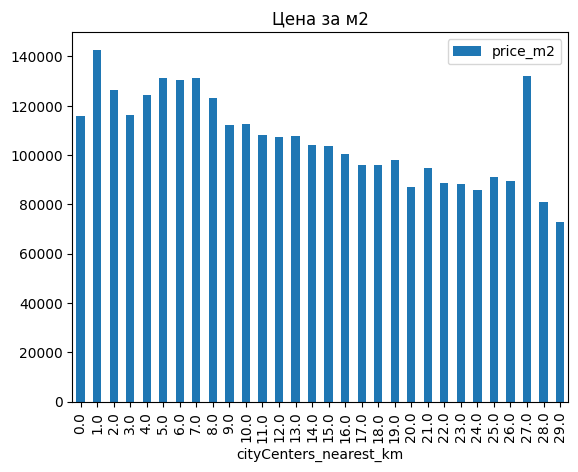

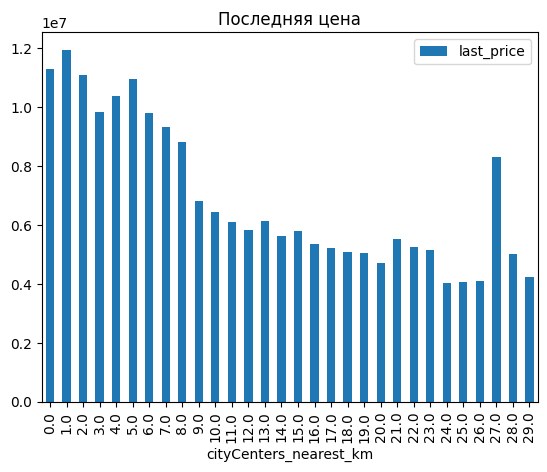

In [37]:
#Выводим стоимость киломметра до центра в городе Санкт-Петербург
saint_petersburg = data.query('locality_name == "Санкт-Петербург"')
saint_petersburg.pivot_table(index='cityCenters_nearest_km', values='price_m2').plot(kind='bar', y='price_m2');
plt.title('Цена за м2');
saint_petersburg.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(kind='bar', y='last_price');
plt.title('Последняя цена');
display(saint_petersburg.loc[(saint_petersburg['cityCenters_nearest_km'] == 27) | (saint_petersburg['cityCenters_nearest_km'] == 28)])

На графике, со средней стоимостью за м2, видно что в радиусе 10км, цена скачет в районе 113тыс - 125тыс руб за м2. Далее виден тренд уменшение стоимости с удалением от центра. Так же, если составить график со средней стоимостью квартиры, то виднен такой же тренд на уменьшение стоимости квартиры с отдалением от центра города. На графике виден аномальный пик на 27 км от центра. Данный пик скорее всего возник из-за того, что собственник либо выставил элитную недвижимость в данном районе, либо по завышенной цене. Так как на данном участке, только одно объявление.

### Общий вывод

В данном исследовании была выдвинута задача, как быстро продаются квартиры и как влияют различные факторы на стоимость квартиры.

**Выдвинутые задачи:**
1. Изучить скорость продажи квартир
2. Влияние на стоимость квартиры таких параметров как: 
- общей площади
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);
3. Выделить 10 населеных пунктов с наибольшим количеством объявлений и среднюю стоимость за м2 в данных регионах
4. Влияет ли отдаленость от центра города на стоимость м2 и стоимость квартиры в г. Санкт-Петербург

**В ходе исследования:**
1. Были изменены пропуски в столбцах на наиболее близкие по значению. А именно:
- в столбце высота потолков, были изменены аномально высокие значения, такие как например 25 и заменены на 2.5, так как пользователи скорее всего при воде ошибались и не ставили дробную часть в нужных местах. Пропуски были заменены медианым значением, высоты потолков зданий аналогичной этажностью. Так же были удалены аномально низкие значения квартиры с потолком ниже 2.5м и квартиры с потолком выше 4м
- в столбце общая этажность дома, были заменены пропуски отталкиваясь от того на каком этаже находится квартира, и заменены на наиболее часто встречаемые такие как 5 этажей, 9, 16 и 25 этажей.
- в столбце жилая площадь пропуски были заменены на процентное соотношение жилой площади от общей площади. Процент был высчитан по наиболее часто встречаемым срезам общей площади.
- аналогичным образом были заменены пропуски в столбце площадь кухни
- в столбце апартаменты пропуски были заменены на логическое значение False, так как данный пункт человек пропустил из-за того, что у него квартира, а не апартаменты
- пропуски в столбце балконы был заменен на значение 0, так как человек пропустивший данный пункт в квартире скорее всего не имеет балкона
- пропуски в столбцах, которые показывают растояние до ближайших объектов (таких как аэропорт, центр города), а так же количество данных объектов в радиусе 3км, решено было не трогать. Пропусков в данных столбцах много, при удалении их или замене другими значениями, конечный результат исследования может быть искажен.
2. Были добавленны новые столбцы цена за квадратный метр, столбцы по дням недели, месяцу и году, столбец с типом этажа (первый, последний, другой), столбец в километрах от центра города.
3. В столбцах были удаленны, аномальные значения, которые были незначительны, но могли исказить конечный результат исследования:
- столбец общая площадь - значения меньше 12 и больше 400
- строки со значением жилой площади менее 10м2
- строки со значениями кухни меньше 4 и больше 55
- стоимость квартиры менее 5тыс и более 30млн
- строки со значением комнат 0

**Были решены задачи:**

Медианое время продажи квартиры является 95 дней. Среднее время является 181 день. Лучше ориентироваться на медианое значения, так как из-за аномально высоких значений, которые мы видим из 1 графика, среднее значение искажено. Быстрыми продажами можно считать квартиры, которые продались менее, чем за 50 дней, вто время к долгим продажам относится те квартиры, которые продавались свышше 210 дней.
Нормальное время продажи составляет от 50 до 210 дней. Если квартира продана менее, чем за 50 дней, то стоит задуматься, не является ли данная стоимость низкой. В тоже время если квартира не может продатся более 210 дней, желательно пересмотреть предложение, возможно цена является высокой, или стоит подумать над улучшением предложения (например косметический ремонт).

**Были данны ответы на гипотизы:**
1. Влияние параметров квартиры на стоимость:
- Из построенных графиков мы видим, что наиболее цена зависит от площади продаваемой квартиры. Видим яркую взаимосвязь вплоть до 150м2. Далее цены не так четко зависят от площади. Это логично, ведь как правило квартиры площадью свыше 150м2 считаются "элитными" и помимо плащади люди оценивают так же местоположение, ремонт, состояние, статус дома. 
- Так же цена жилья зависит от жилой площади и площади кухни, что вытекает из первого графика общей площади. Ведь чем больше общая площадь тем больше в квартире жилой площади и площадь кухни. По графику так же видно, что цена при площади кухни после 20м2 менее зависима, это можно так же объяснить, тем что кухни свыше 20м2 находятся в квартирах премиум класса. 
- Так же на цену влияет и количество комнат, что так же логично, чем больше комнат, тем больше площадь квартиры. 
- Менее на цену влияет тип этажности. Первый этаж и последние как правило дешевле стоят, чем квартиры на других этажах. Меньше всего на цену влияет день недели и месяц. Так же видим что в 2014 году обьем рынка был значительно выше, чем последующие года.
2. Наибольшее количество объявлений как и следовало ожидать находится в Санкт-Петербурге, количество продаваемых квартир, в разы выше чем в остальных областях и районах. Второе место Всеволожск, но он уже значительно отстает по стоимости за м2. Тем не менее, лидер по стоимости за м2 жилья занимает Зеленогорск. В то время как поселок Совхозный является, наиболее дешевый квадратный метр.
3. Отдаленость от центра в г. Санкт-Петербург уменьшает стоимость за м2 на 10тыс руб за каждые 3км, начиная с 10км от центра. Но если брать среднюю стоимость квартиры, то до 10км цена падает на 1млн, а после 10км от центра падает уже не так стремительно, в среднем по 300тыс за км.

**Общие рекомендации**

- Наиболее значимое влияние на стоимость жилья имеет общая площадь помещения. Из этого вытекает влияние на цену таких параметров как площадь кухни и жилой площади, а так же комнатность квартиры.
- В данных, которые проставляются автоматически, растояние до объектов, очень много пропусков. Для более качественного анализа, желательно разобраться из-за чего они происходят, и провести повторное исследования.